Learning Curve:
Confusion Matrix Heatmap: 
Bar Chart:
Micro-Averaged ROC Curve
Precision-Recall Curve: 
Calibration Curve:



# Dataset

In [43]:
import os

def get_subdirectories(directory):
    subdirectories = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
    return subdirectories

def list_directories(directory):
    subdirectories = get_subdirectories(directory)
    quoted_directories = ["'{}'".format(name) for name in subdirectories]
    directories_string = ', '.join(quoted_directories)
    return directories_string


# Specify the directory path
directory_path = './../../archive_101/40words-20230223T070705Z-001/40words'

# Call the function to get the list of directories separated by commas
directories = list_directories(directory_path)

# Print the result
print(directories)


'Aaj', 'bagh', 'Basha', 'Biyog', 'Bondhu', 'bouddho', 'chamra', 'Darano', 'Darao', 'Desh', 'Ekhane', 'girja', 'Gun', 'hockey', 'jail', 'keram', 'Kichuta', 'Kothay', 'Onurodh', 'piano', 'puru', 'Shahajjo', 'She', 'shomajkollan', 'Shomoi', 'shotto', 'Shundor', 'Sir', 'Tara', 'Tumi'


In [11]:
# Check the available physical devices
import tensorflow as tf
physical_devices = tf.config.list_physical_devices()
print(physical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# loaded

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split


In [44]:
labels = ['Aaj', 'bagh', 'Basha', 'Biyog', 'Bondhu', 'bouddho', 'chamra', 'Darano', 'Darao', 'Desh', 'Ekhane', 'girja', 'Gun', 'hockey', 'jail', 'keram', 'Kichuta', 'Kothay', 'Onurodh', 'piano', 'puru', 'Shahajjo', 'She', 'shomajkollan', 'Shomoi', 'shotto', 'Shundor', 'Sir', 'Tara', 'Tumi']

In [37]:
import cv2
import os
import numpy as np
from tqdm import tqdm

X_full = []
y_full = []
image_size = 128
max_pixel_value = 255  # Maximum pixel value for normalization

for i in labels:
    folderPath = os.path.join('./../../archive_101/40words-20230223T070705Z-001/40words', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (image_size, image_size))
        img = img.astype(np.float32) / max_pixel_value  # Normalize pixel values
        X_full.append(img)
        y_full.append(i)

X_full = np.array(X_full)
y_full = np.array(y_full)


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 22.98it/s]


In [27]:
X_full = np.array(X_full)
y_full = np.array(y_full)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Get unique labels
unique_labels = np.unique(y_full)

# Display 1 sample images from each label
num_samples = 1

for label in unique_labels:
    # Get indices of images with the current label
    indices = np.where(y_full == label)[0][:num_samples]
    
    # Select the corresponding images
    images = X_full[indices]
    
    # Plot the images
    plt.figure(figsize=(12, 6))
    for i, image in enumerate(images):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.suptitle('Label: ' + str(label))
    plt.show()


In [38]:
y_full

array(['Aaj', 'Aaj', 'Aaj', ..., 'Tumi', 'Tumi', 'Tumi'], dtype='<U12')

In [ ]:
for i in y_full:
    print(i)

In [ ]:
y_full_new = []
for i in y_full:
    y_full_new.append(labels.index(i))

y_full_new

In [29]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.1


In [42]:
y_full_new = []
for i in y_full:
    y_full_new.append(labels.index(i))
y_full = y_full_new
y_full = tf.keras.utils.to_categorical(y_full)

# split and encode

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_full,y_full, test_size=0.2,random_state=101)

In [10]:
len(X_test)

240

In [11]:
del X_full,y_full
del y_full_new

# train InceptionResNetV2, MobileNetV2, ResNet50V2, DenseNet121, InceptionV3, EfficientNetB2, Xception and plot graphs

In [15]:
from tensorflow.keras.applications import EfficientNetB2, MobileNetV2, InceptionV3, DenseNet121, ResNet50V2, InceptionResNetV2, Xception,EfficientNetV2S
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau

def train_models(X_train, X_test, y_train, y_test):
    # Define image size
    img_size = (image_size, image_size)
    
    # Create model architecture
    models = [InceptionResNetV2, MobileNetV2, ResNet50V2, DenseNet121, InceptionV3, Xception]
    history = []
    mods = []
    for model in models:
        # Load pre-trained model
        base_model = model(include_top=False, weights='imagenet', input_shape=(*img_size, 3))
        reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                                      factor=0.3,
                                      patience=2,
                                      min_delta=0.001,
                                      mode='auto',
                                      verbose=1)
        # Freeze pre-trained layers
        for layer in base_model.layers:
            layer.trainable = False
        
        # Add custom layers
        model = Sequential()
        model.add(base_model)
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(512, activation='relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(30, activation='softmax'))
        
        # Compile model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Fit model
        hist = model.fit(X_train,
                         y_train,
                         validation_split=0.1,
                         verbose=1, 
                         batch_size=32,
                         epochs=20,
                         callbacks=[reduce_lr])
        history.append(hist)
        mods.append(model)
    return history, mods


In [16]:
history, mods=train_models(X_train, X_test, y_train, y_test)

Epoch 1/20
27/27 [==============================] - 11s 104ms/step - loss: 3.2782 - accuracy: 0.1771 - val_loss: 2.2907 - val_accuracy: 0.3854 - lr: 0.0010
Epoch 2/20
27/27 [==============================] - 1s 32ms/step - loss: 1.4367 - accuracy: 0.5938 - val_loss: 1.3586 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 3/20
27/27 [==============================] - 1s 32ms/step - loss: 0.7803 - accuracy: 0.7882 - val_loss: 0.8815 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/20
27/27 [==============================] - 1s 32ms/step - loss: 0.4820 - accuracy: 0.8507 - val_loss: 0.9595 - val_accuracy: 0.7292 - lr: 0.0010
Epoch 5/20
27/27 [==============================] - 1s 32ms/step - loss: 0.3065 - accuracy: 0.9062 - val_loss: 0.8156 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 6/20
27/27 [==============================] - 1s 32ms/step - loss: 0.1819 - accuracy: 0.9479 - val_loss: 0.6345 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 7/20
27/27 [==============================] - 1s 32ms/step - loss: 0

In [17]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


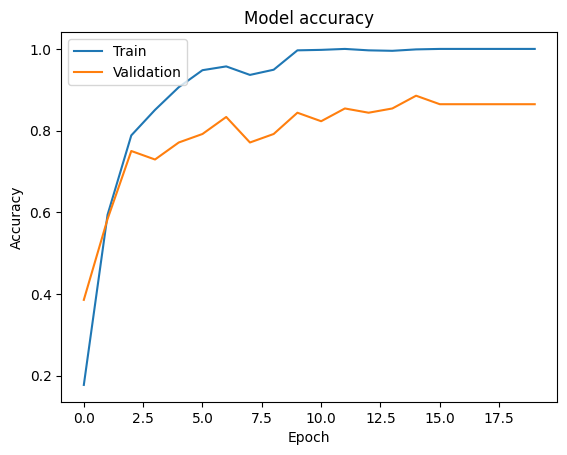

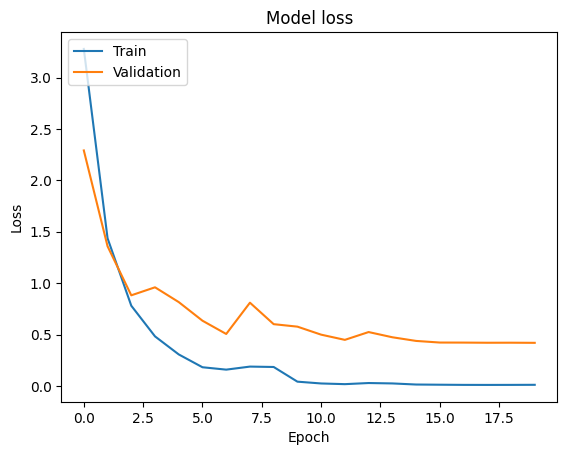

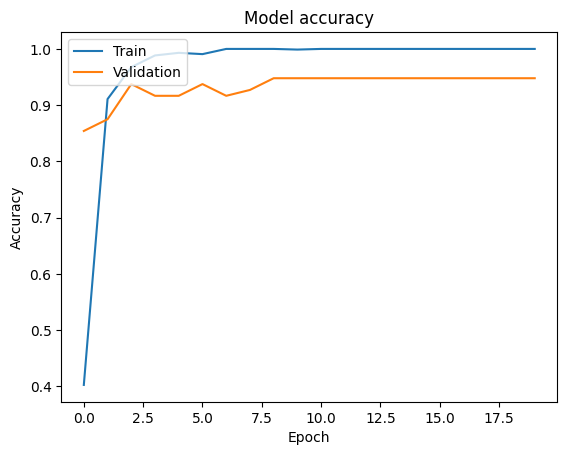

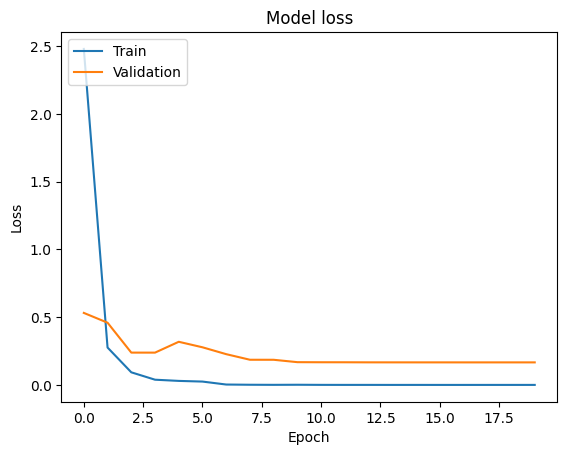

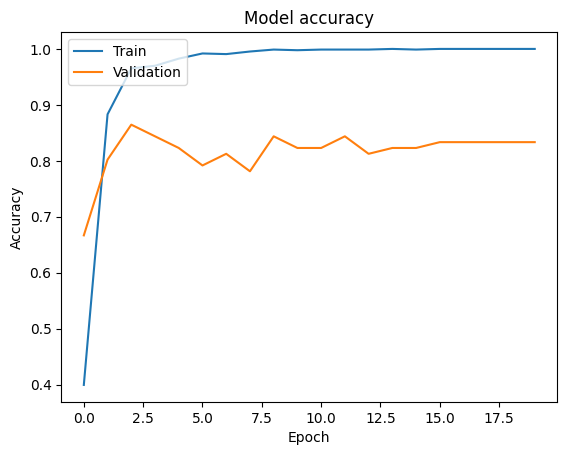

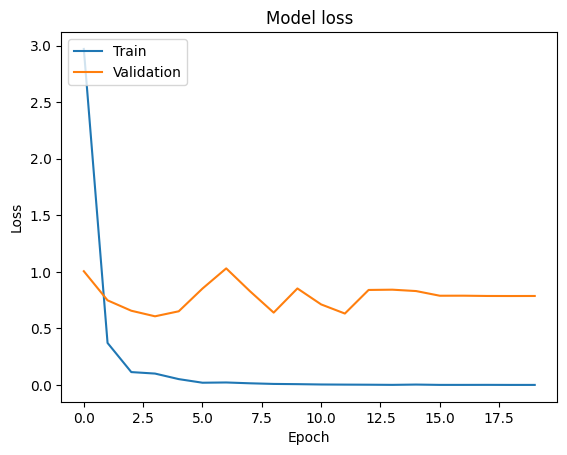

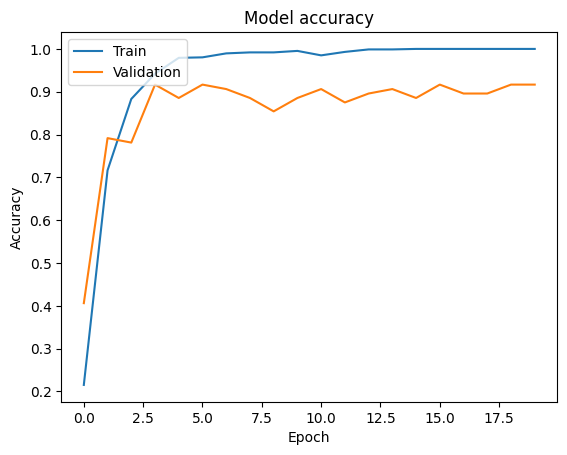

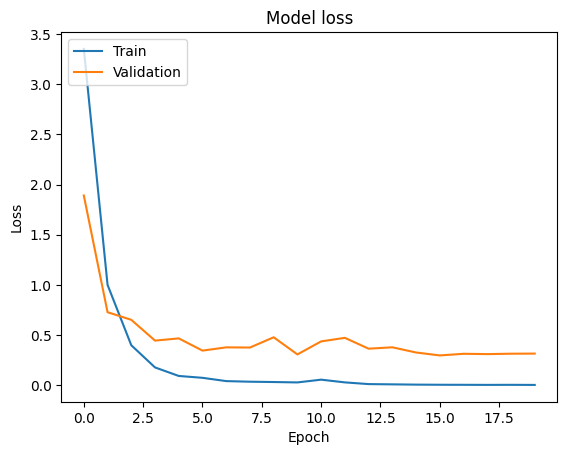

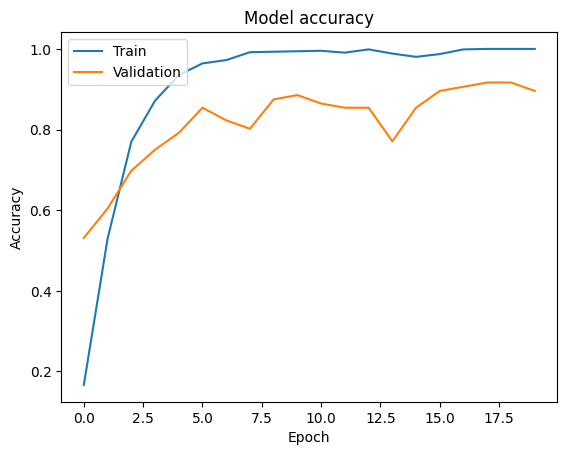

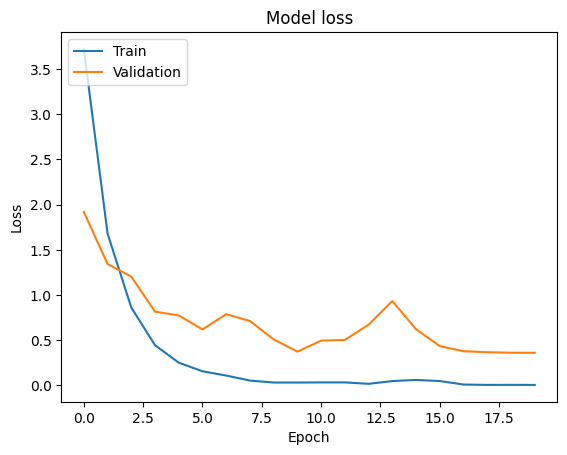

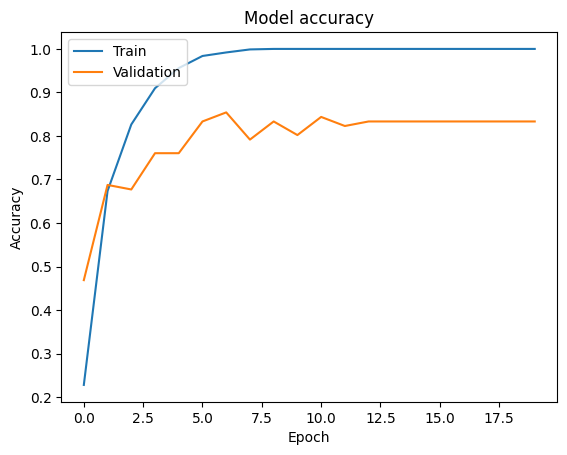

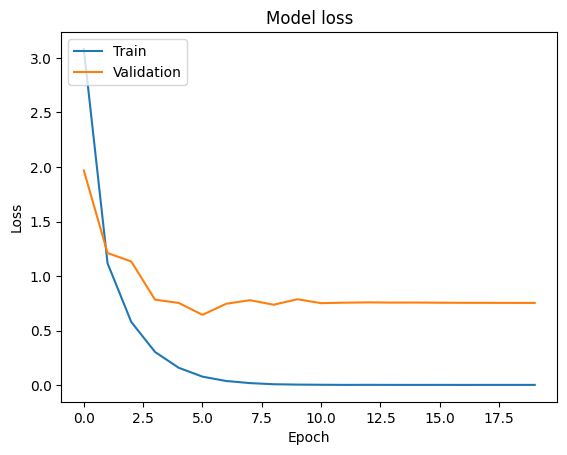

In [18]:
for h in history:
  plot_history(h)

8/8 [==============================] - 2s 93ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         8
           3       0.91      0.91      0.91        11
           4       0.70      0.70      0.70        10
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      0.60      0.75        10
           8       0.90      1.00      0.95         9
           9       0.71      0.71      0.71         7
          10       0.67      0.75      0.71         8
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         8
          13       1.00      0.86      0.92         7
          14       1.00      0.83      0.91         6
          15       0.83      0.91      0.87        11
          16       0.71      

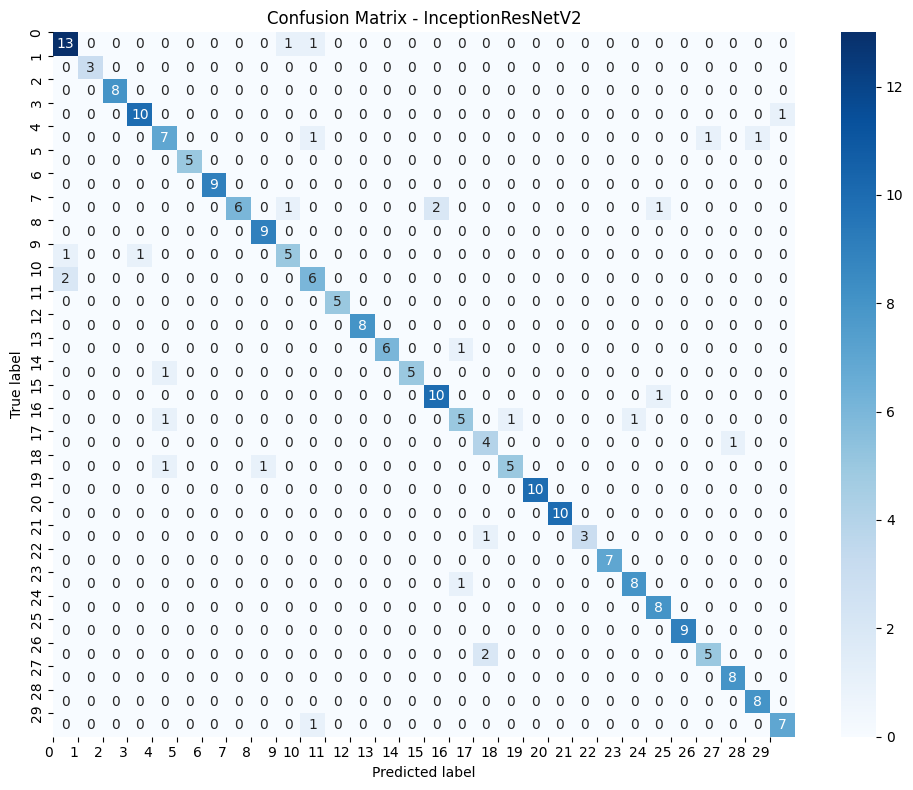

8/8 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00         3
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00        11
           4       0.90      0.90      0.90        10
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         9
           9       0.88      1.00      0.93         7
          10       0.80      1.00      0.89         8
          11       1.00      1.00      1.00         5
          12       1.00      0.88      0.93         8
          13       1.00      1.00      1.00         7
          14       1.00      0.83      0.91         6
          15       0.92      1.00      0.96        11
          16       1.00      

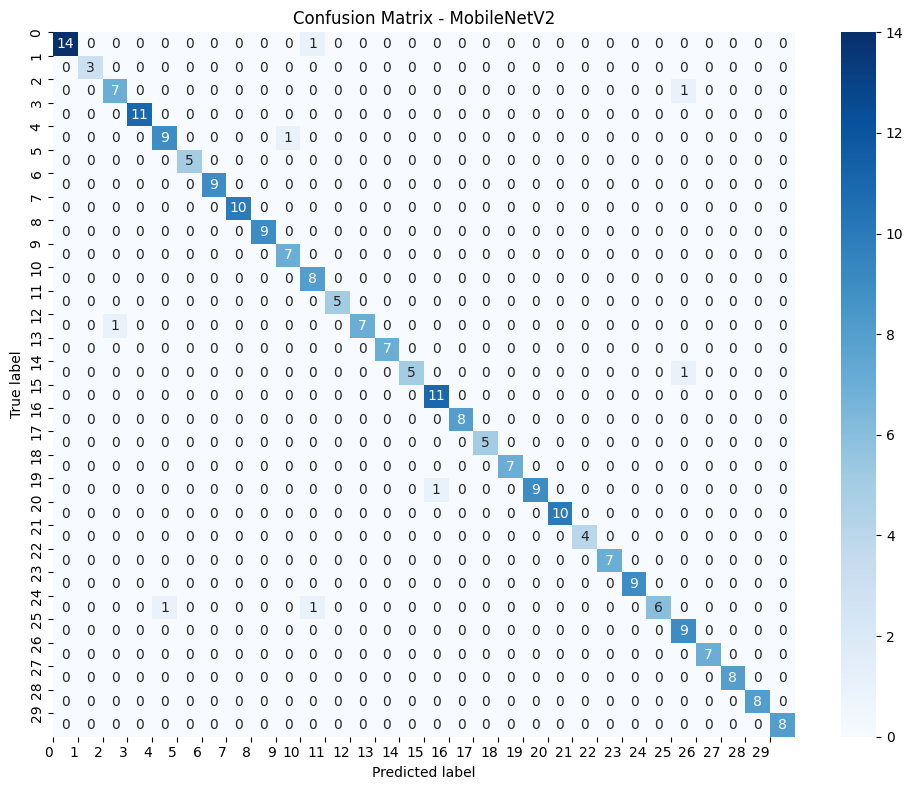

8/8 [==============================] - 1s 48ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         8
           3       1.00      0.91      0.95        11
           4       0.71      1.00      0.83        10
           5       0.71      1.00      0.83         5
           6       0.90      1.00      0.95         9
           7       1.00      0.60      0.75        10
           8       1.00      1.00      1.00         9
           9       0.75      0.86      0.80         7
          10       0.67      0.75      0.71         8
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         8
          13       0.88      1.00      0.93         7
          14       0.75      0.50      0.60         6
          15       0.73      1.00      0.85        11
          16       1.00      

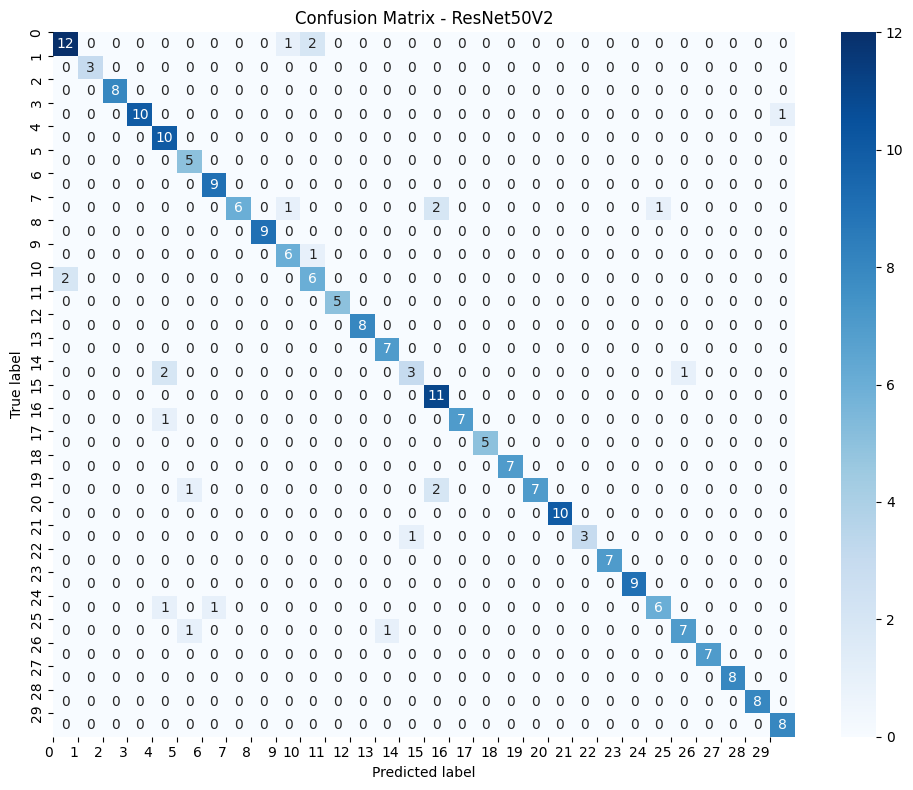

8/8 [==============================] - 2s 70ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         8
           3       0.83      0.91      0.87        11
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00         5
           6       0.90      1.00      0.95         9
           7       1.00      0.70      0.82        10
           8       1.00      1.00      1.00         9
           9       0.75      0.43      0.55         7
          10       0.57      1.00      0.73         8
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         7
          14       1.00      0.83      0.91         6
          15       0.85      1.00      0.92        11
          16       1.00      

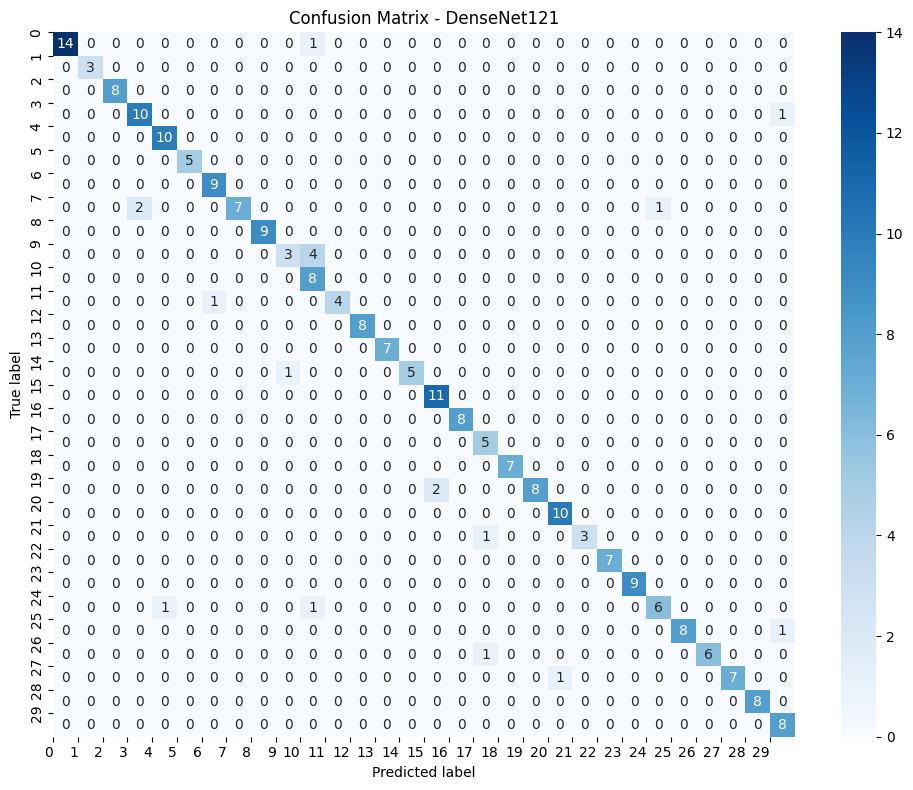

8/8 [==============================] - 1s 54ms/step
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         8
           3       0.82      0.82      0.82        11
           4       0.88      0.70      0.78        10
           5       0.71      1.00      0.83         5
           6       0.80      0.89      0.84         9
           7       1.00      0.70      0.82        10
           8       1.00      1.00      1.00         9
           9       0.70      1.00      0.82         7
          10       0.80      1.00      0.89         8
          11       1.00      1.00      1.00         5
          12       1.00      0.62      0.77         8
          13       1.00      0.86      0.92         7
          14       1.00      0.33      0.50         6
          15       0.79      1.00      0.88        11
          16       0.64      

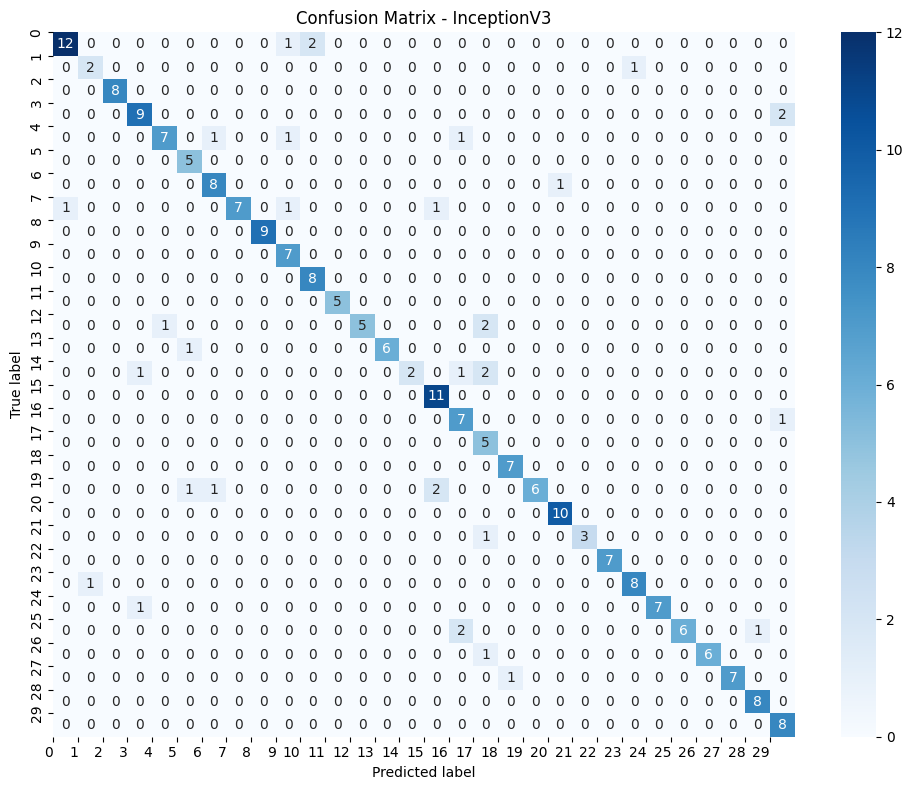

8/8 [==============================] - 1s 41ms/step
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      1.00      1.00         3
           2       0.83      0.62      0.71         8
           3       0.91      0.91      0.91        11
           4       0.90      0.90      0.90        10
           5       1.00      1.00      1.00         5
           6       0.80      0.89      0.84         9
           7       0.88      0.70      0.78        10
           8       1.00      1.00      1.00         9
           9       0.71      0.71      0.71         7
          10       0.67      1.00      0.80         8
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         8
          13       0.88      1.00      0.93         7
          14       1.00      0.83      0.91         6
          15       0.79      1.00      0.88        11
          16       0.86      

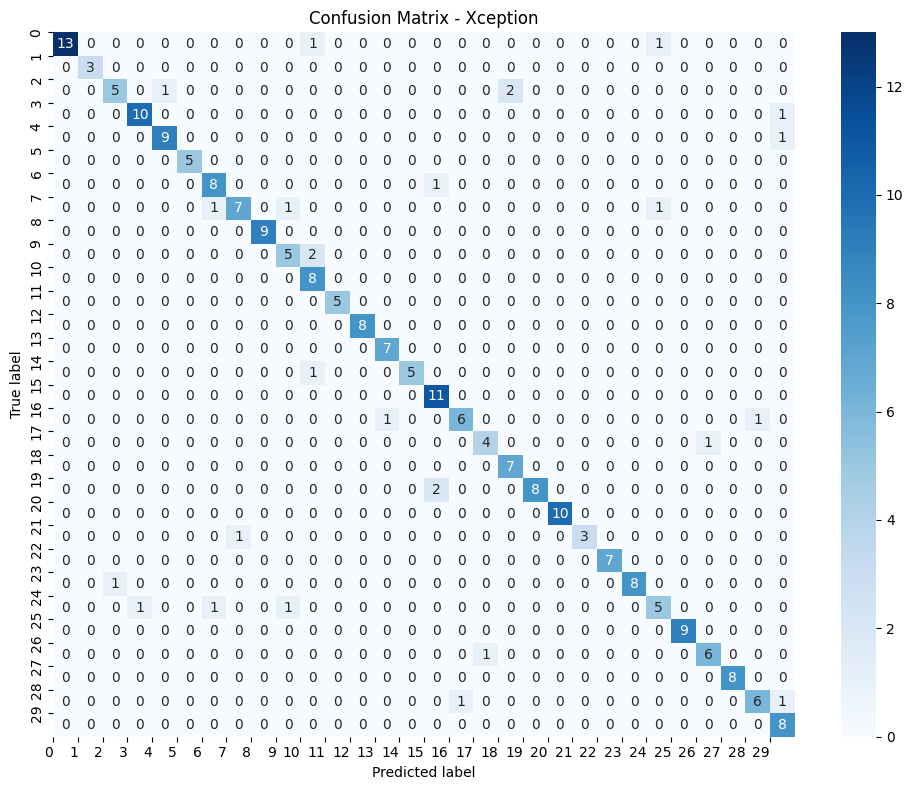

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

model_names = ['InceptionResNetV2', 'MobileNetV2', 'ResNet50V2', 'DenseNet121', 'InceptionV3', 'Xception']

# Iterate over models
for i, model in enumerate(mods):
    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)
    y_test_new = np.argmax(y_test, axis=1)

    # Print classification report
    print(classification_report(y_test_new, pred))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_new, pred)

    # Create a figure and axis with larger size
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

    # Set labels, title, and ticks
    classes = np.unique(y_test_new)
    num_classes = len(classes)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'Confusion Matrix - {model_names[i]}')
    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    # Rotate the tick labels and set alignment
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

    # Adjust the layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()


In [20]:
for m in mods:
  results2 = m.evaluate(X_test,y_test)
  results = m.evaluate(X_train,y_train)
  print("test: "+str(results2))
  print("train: "+str(results))

30/30 [==============================] - 1s 49ms/step - loss: 0.0452 - accuracy: 0.9865
test: [0.3788784444332123, 0.8833333253860474]
train: [0.04515490680932999, 0.9864583611488342]
30/30 [==============================] - 0s 11ms/step - loss: 0.0168 - accuracy: 0.9948
test: [0.15601615607738495, 0.9666666388511658]
train: [0.016811814159154892, 0.9947916865348816]
30/30 [==============================] - 1s 22ms/step - loss: 0.0787 - accuracy: 0.9833
test: [0.6437883973121643, 0.9041666388511658]
train: [0.07873602211475372, 0.9833333492279053]
30/30 [==============================] - 1s 36ms/step - loss: 0.0320 - accuracy: 0.9917
test: [0.3159842789173126, 0.9208333492279053]
train: [0.031963519752025604, 0.9916666746139526]
30/30 [==============================] - 1s 31ms/step - loss: 0.0374 - accuracy: 0.9896
test: [0.5497503876686096, 0.8583333492279053]
train: [0.03741501271724701, 0.9895833134651184]
30/30 [==============================] - 1s 26ms/step - loss: 0.0770 - accura

8/8 [==============================] - 0s 26ms/step - loss: 0.4741 - accuracy: 0.8875


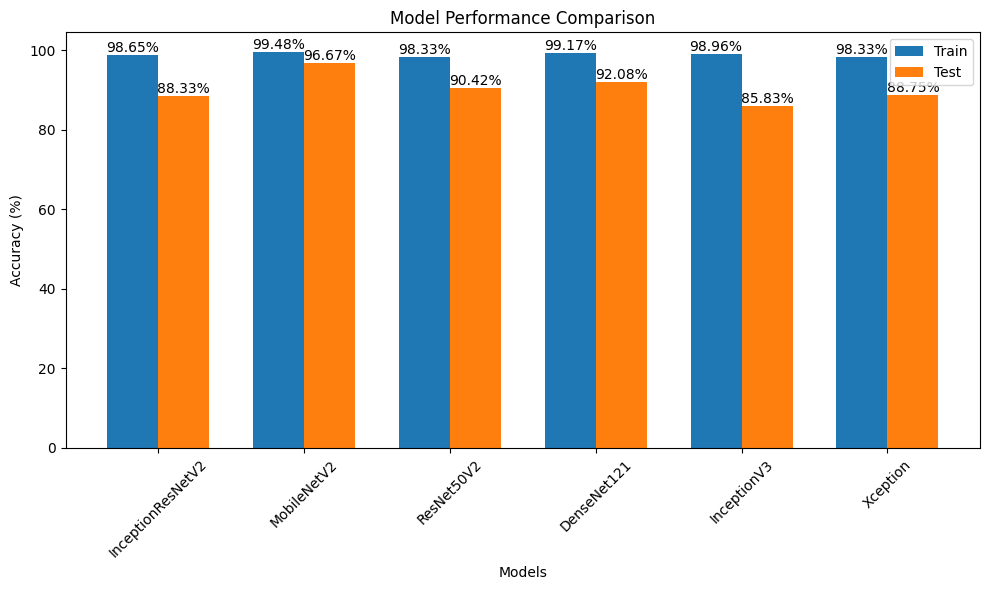

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Lists to store the evaluation results
train_results = []
test_results = []

# Iterate over the models
for m in mods:
    results_train = m.evaluate(X_train, y_train)
    results_test = m.evaluate(X_test, y_test)
    train_accuracy = results_train[1] * 100  # Assuming accuracy is the second element in the results_train tuple/list
    test_accuracy = results_test[1] * 100  # Assuming accuracy is the second element in the results_test tuple/list
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

# List of model names
model_names = ['InceptionResNetV2', 'MobileNetV2', 'ResNet50V2', 'DenseNet121', 'InceptionV3', 'Xception']   # Replace with actual model names

# Calculate the positions for the bars
bar_width = 0.35
x_train = np.arange(len(model_names))
x_test = x_train + bar_width

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
train_bars = plt.bar(x_train, train_results, width=bar_width, label='Train')
test_bars = plt.bar(x_test, test_results, width=bar_width, label='Test')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.legend()

# Add annotations with values on top of the bars
for bar in train_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

for bar in test_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xticks(x_train + bar_width / 2, model_names, rotation=45)
plt.tight_layout()
plt.show()


8/8 [==============================] - 0s 49ms/step


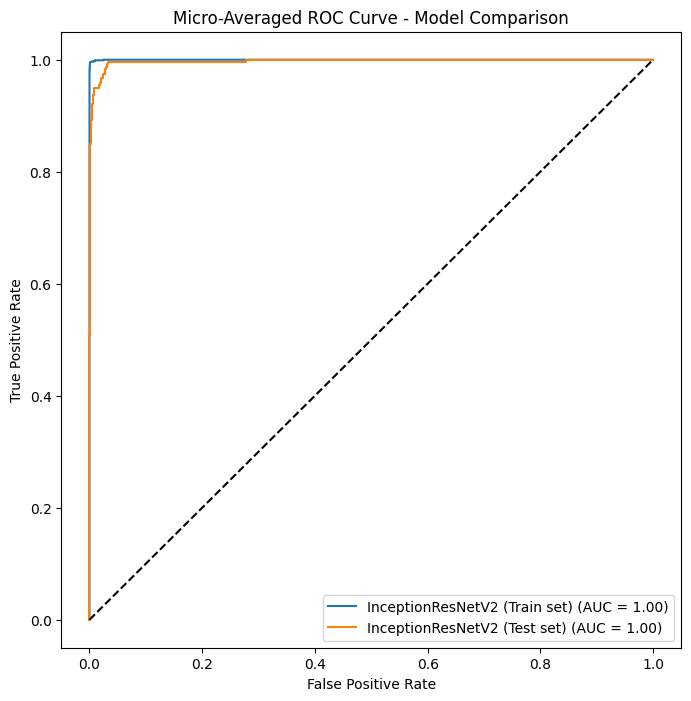

8/8 [==============================] - 0s 10ms/step


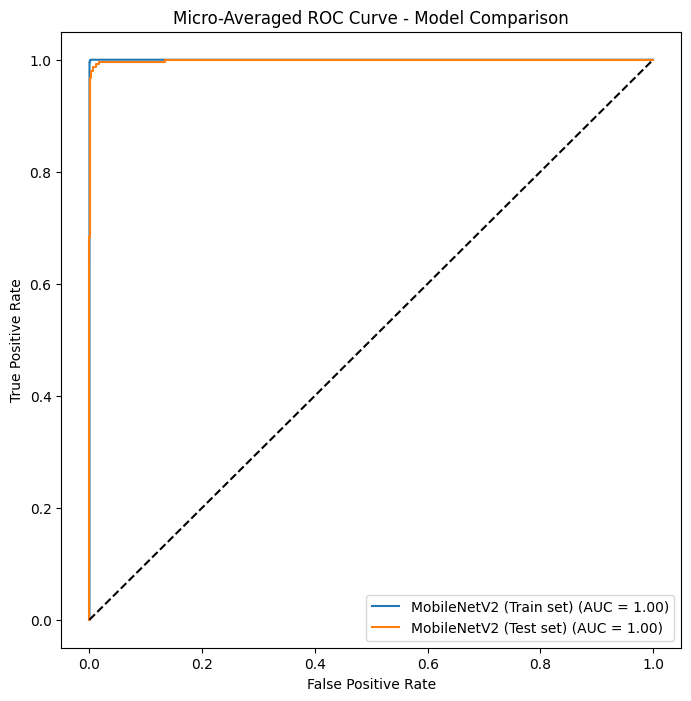

8/8 [==============================] - 0s 20ms/step


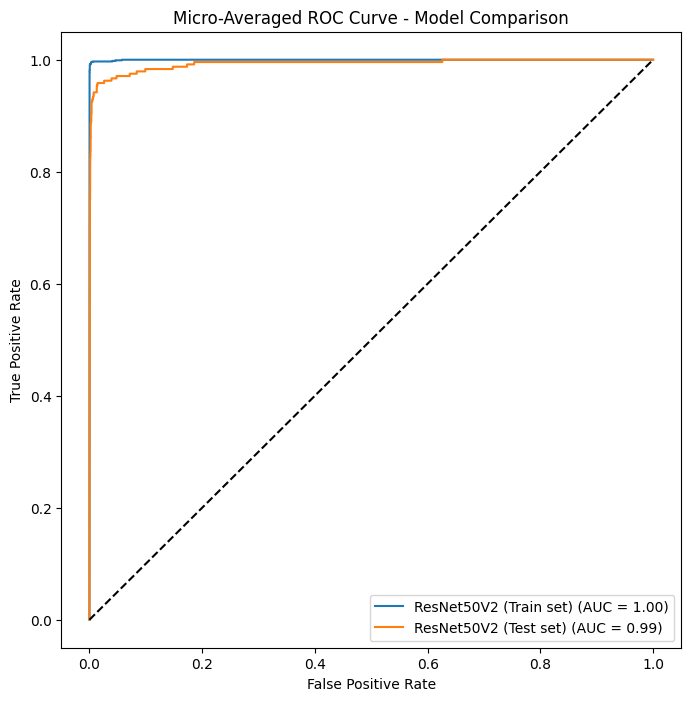

8/8 [==============================] - 0s 35ms/step


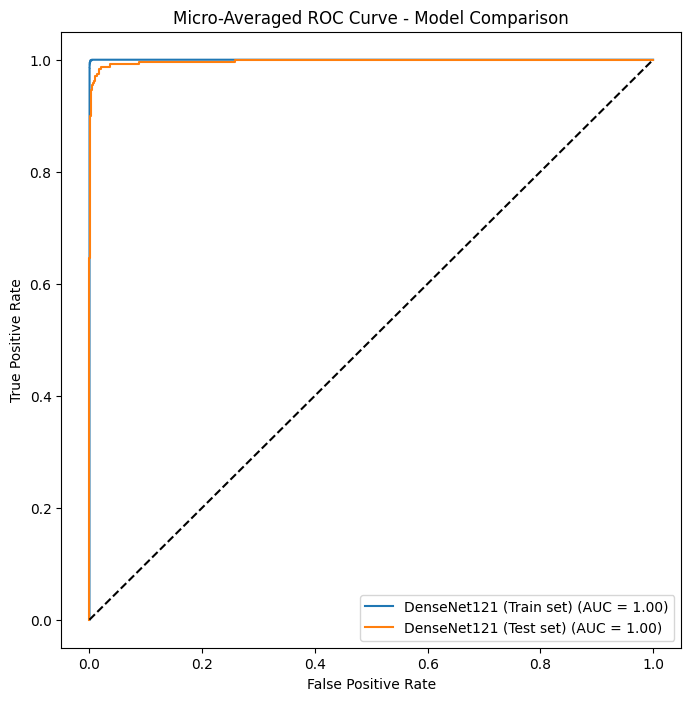

8/8 [==============================] - 0s 31ms/step


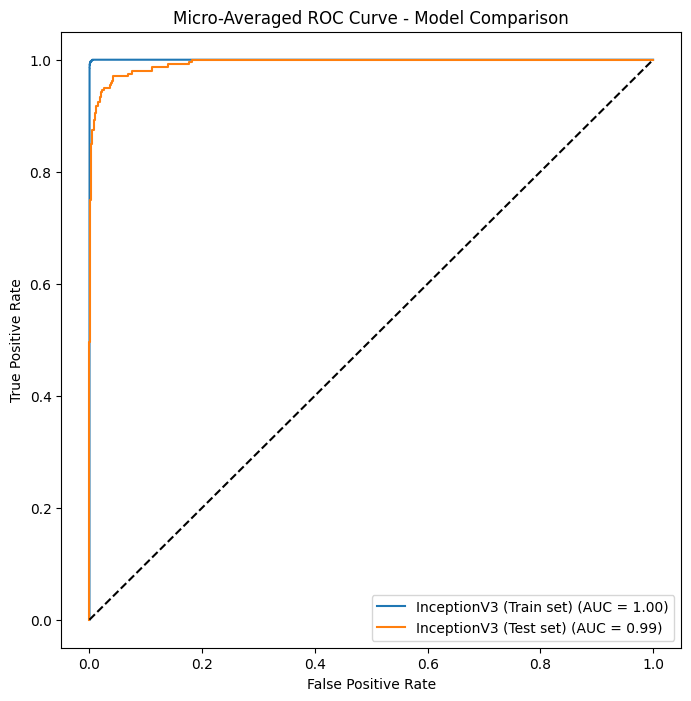

8/8 [==============================] - 0s 24ms/step


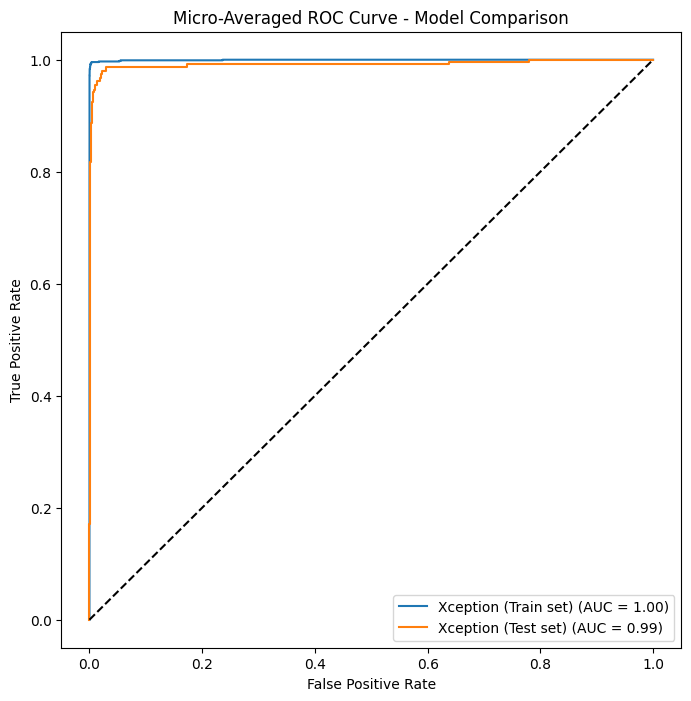

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

model_names = ['InceptionResNetV2', 'MobileNetV2', 'ResNet50V2', 'DenseNet121', 'InceptionV3', 'Xception']

# Iterate over the models
for i, m in enumerate(mods):
    # Evaluate the model
    results_train = m.evaluate(X_train, y_train)
    results_test = m.evaluate(X_test, y_test)
    train_accuracy = results_train[1] * 100  # Assuming accuracy is the second element in the results_train tuple/list
    test_accuracy = results_test[1] * 100  # Assuming accuracy is the second element in the results_test tuple/list

    # Calculate the predicted probabilities for each class
    y_pred_train = m.predict(X_train)
    y_pred_test = m.predict(X_test)

    # Calculate the micro-averaged false positive rate (FPR), true positive rate (TPR), and area under the curve (AUC)
    fpr_train, tpr_train, _ = roc_curve(y_train.ravel(), y_pred_train.ravel())
    fpr_test, tpr_test, _ = roc_curve(y_test.ravel(), y_pred_test.ravel())
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot the ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_train, tpr_train, label=f'{model_names[i]} (Train set) (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'{model_names[i]} (Test set) (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Micro-Averaged ROC Curve - Model Comparison')
    plt.legend(loc='lower right')
    plt.show()


8/8 [==============================] - 0s 48ms/step


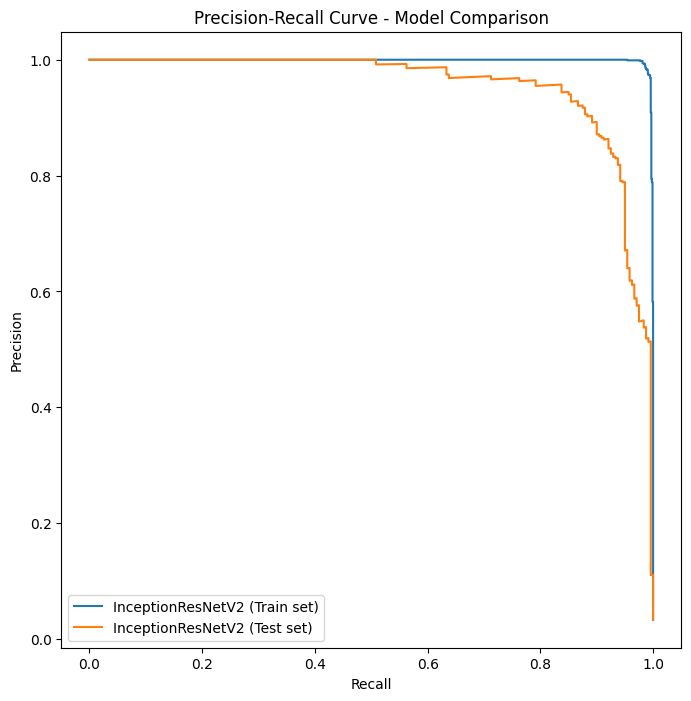

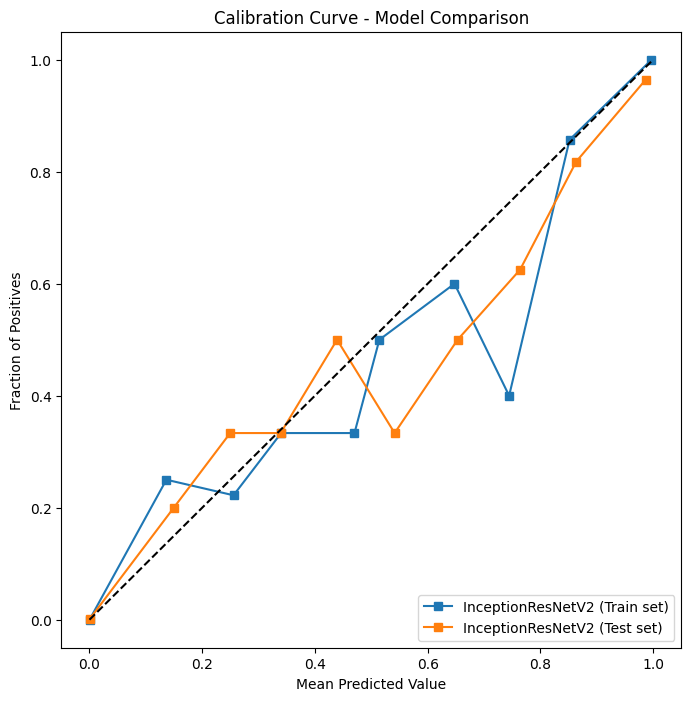

8/8 [==============================] - 0s 8ms/step


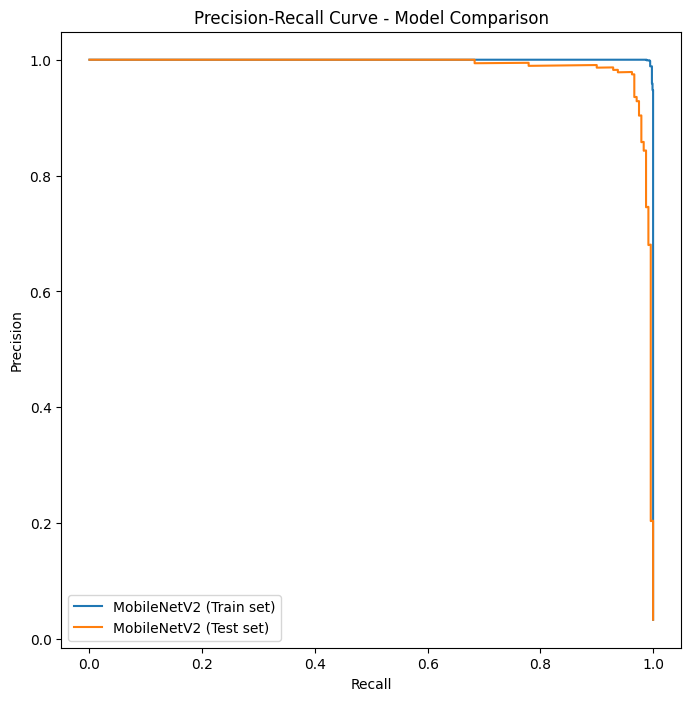

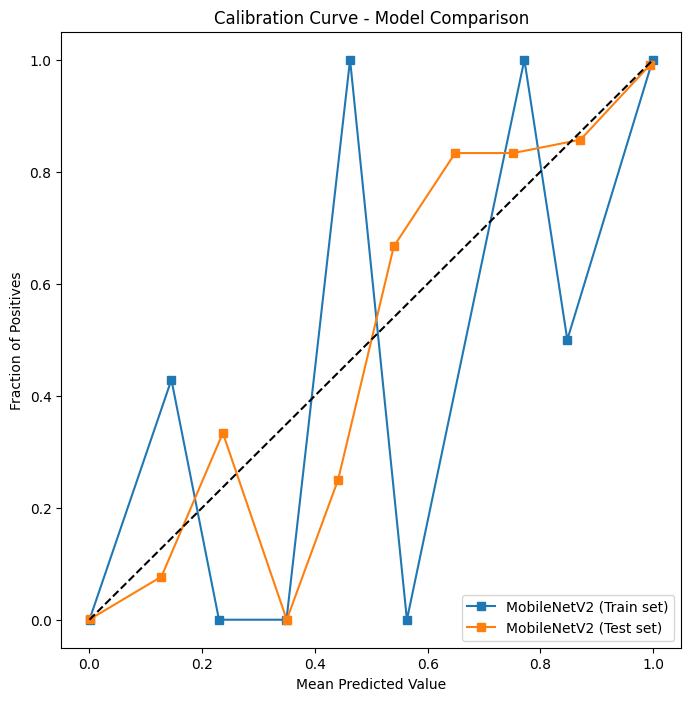

8/8 [==============================] - 0s 20ms/step


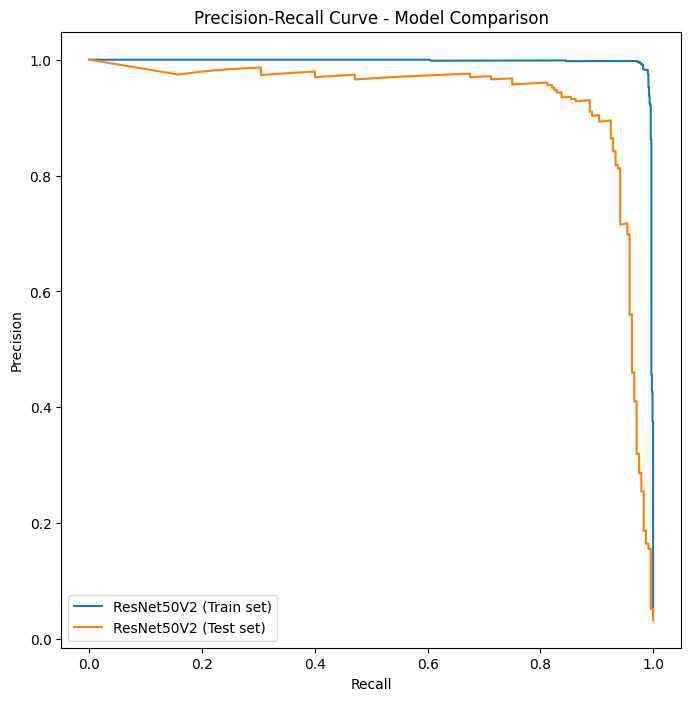

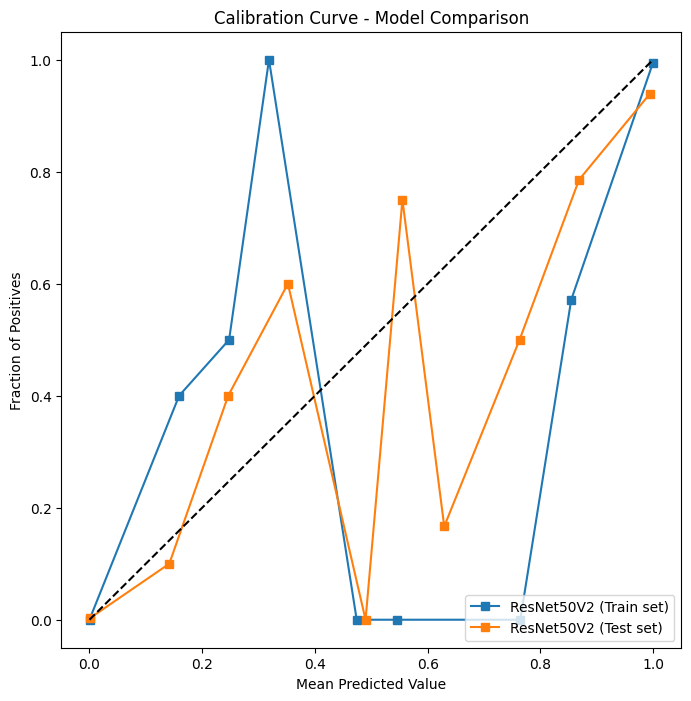

8/8 [==============================] - 0s 36ms/step


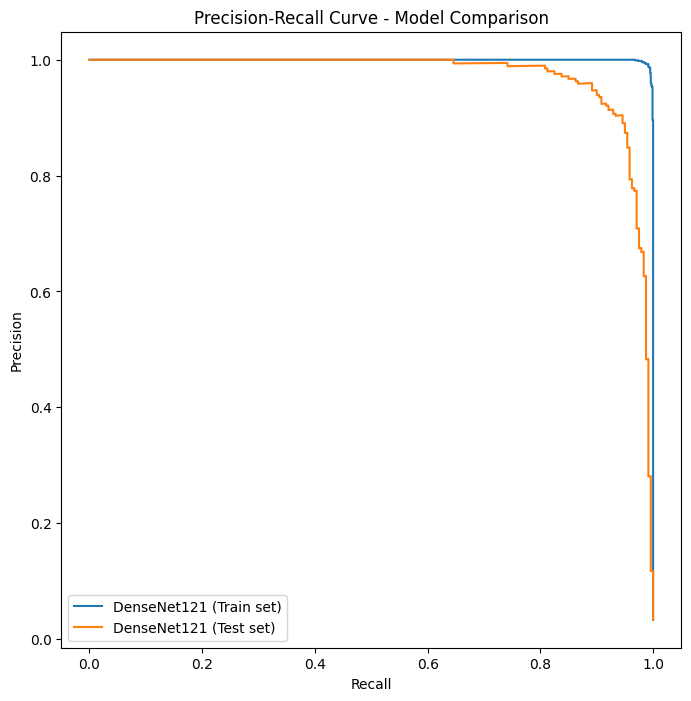

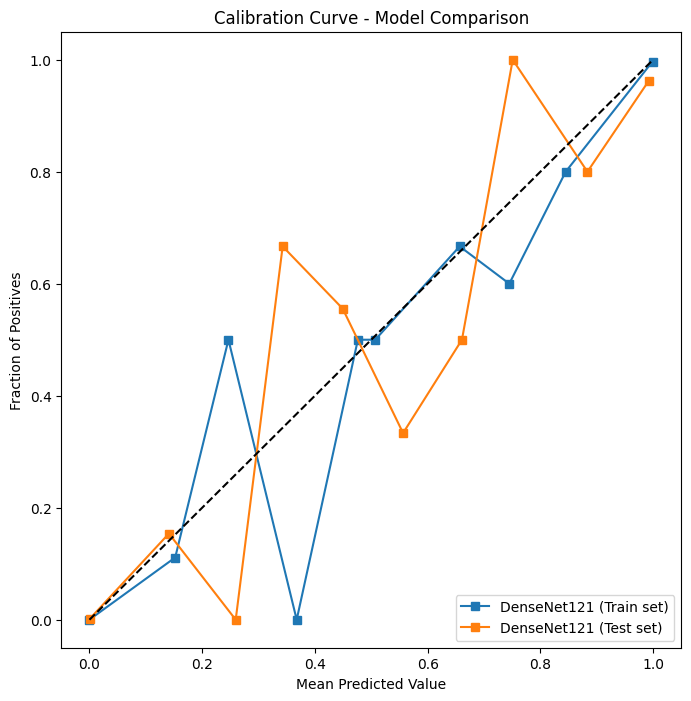

8/8 [==============================] - 0s 31ms/step


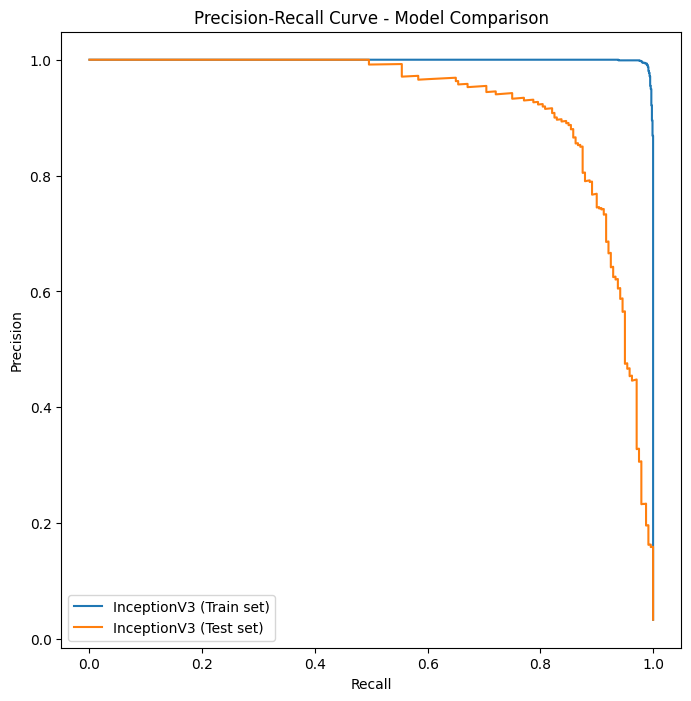

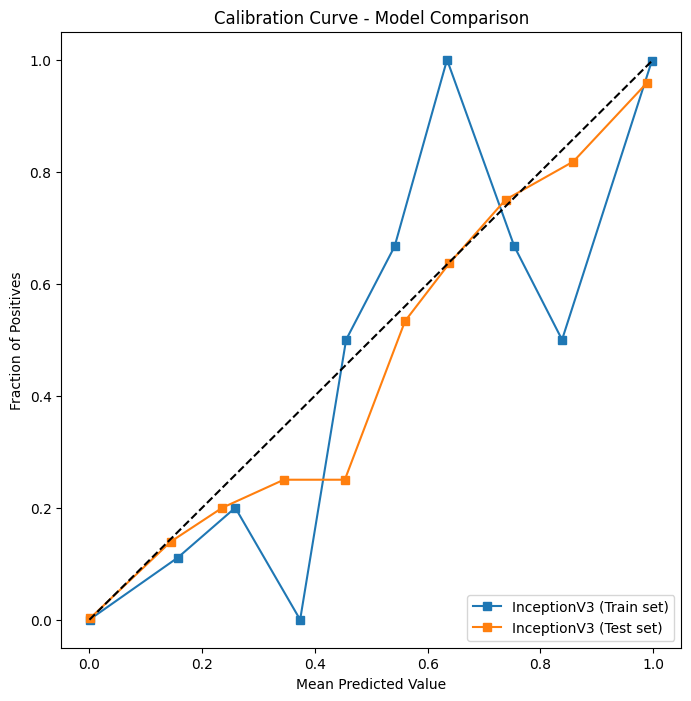

8/8 [==============================] - 0s 24ms/step


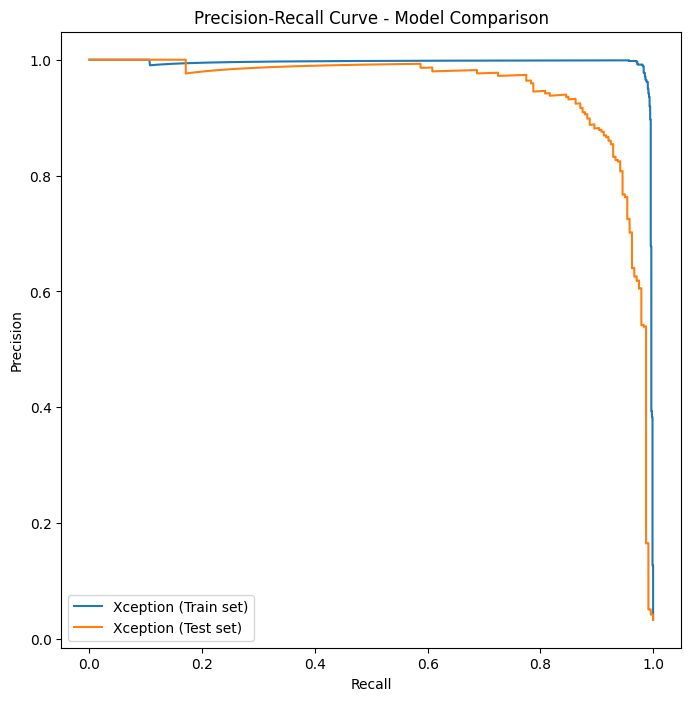

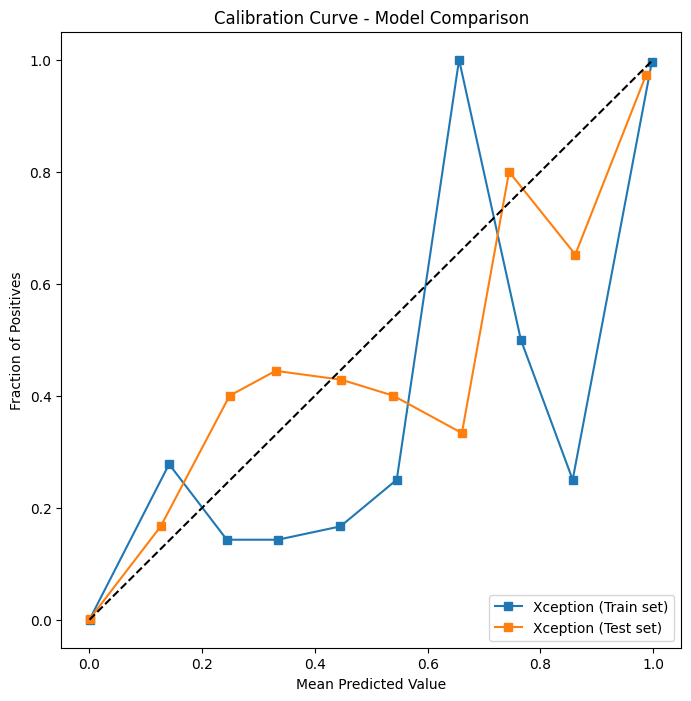

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve

model_names = ['InceptionResNetV2', 'MobileNetV2', 'ResNet50V2', 'DenseNet121', 'InceptionV3', 'Xception']

# Iterate over the models
for i, m in enumerate(mods):
    # Calculate the predicted probabilities for each class
    y_pred_train = m.predict(X_train)
    y_pred_test = m.predict(X_test)

    # Calculate precision and recall
    precision_train, recall_train, _ = precision_recall_curve(y_train.ravel(), y_pred_train.ravel())
    precision_test, recall_test, _ = precision_recall_curve(y_test.ravel(), y_pred_test.ravel())

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 8))
    plt.plot(recall_train, precision_train, label=f'{model_names[i]} (Train set)')
    plt.plot(recall_test, precision_test, label=f'{model_names[i]} (Test set)')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Model Comparison')
    plt.legend(loc='lower left')
    plt.show()

    # Calculate the true positive rate and predicted positive rate for calibration
    true_positive_rate_train, predicted_positive_rate_train = calibration_curve(y_train.ravel(), y_pred_train.ravel(), n_bins=10)
    true_positive_rate_test, predicted_positive_rate_test = calibration_curve(y_test.ravel(), y_pred_test.ravel(), n_bins=10)

    # Plot Calibration Curve
    plt.figure(figsize=(8, 8))
    plt.plot(predicted_positive_rate_train, true_positive_rate_train, 's-', label=f'{model_names[i]} (Train set)')
    plt.plot(predicted_positive_rate_test, true_positive_rate_test, 's-', label=f'{model_names[i]} (Test set)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Mean Predicted Value')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve - Model Comparison')
    plt.legend(loc='lower right')
    plt.show()


In [24]:
# Save the best model
from tensorflow.keras.models import save_model
save_model(mods[1], 'words-MobileNetV2.h5')